In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.probability import FreqDist

# Importation

In [35]:
df = pd.read_csv('database.csv', 
                dtype={'channelId': str,'videoId': str, 'author': str, 'comment':str}, 
                parse_dates=['publishedAt','extractedAt'])
# df['channelId'] = df['channelId'].astype(str)  # Convertir la colonne 'channelId' en chaîne de caractères
# df['videoId'] = df['videoId'].astype(str)  # Convertir la colonne 'videoId' en chaîne de caractères
# df['author'] = df['author'].astype(str)  # Convertir la colonne 'author' en chaîne de caractères
# df['comment'] = df['comment'].astype(str) 
df.head()

,channelId,videoId,author,publishedAt,comment,extractedAt
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10


# EDA premier niveau :comptage et distibution

In [36]:
df.describe()

,extractedAt
count,1731
mean,2025-07-01 11:46:20.023685632
min,2025-07-01 11:46:10
25%,2025-07-01 11:46:15
50%,2025-07-01 11:46:20
75%,2025-07-01 11:46:25
max,2025-07-01 11:46:31


In [37]:
df.dtypes

channelId                   object
videoId                     object
author                      object
publishedAt    datetime64[ns, UTC]
comment                     object
extractedAt         datetime64[ns]
dtype: object

In [41]:
# le nombre de commentaires
print(f'Nombre de commentaires : {df.shape[0]}')
df['author'].nunique()  
# le nombre d'utilisateurs uniques
print(f'Nombre d\'utilisateurs uniques : {df["author"].nunique()}')
# le nombre de commentaires par utilisateur
print(f'Nombre moyen de commentaires par utilisateur : {df.groupby("author").size().mean():.2f}')

Nombre de commentaires : 1731
Nombre d'utilisateurs uniques : 1675
Nombre moyen de commentaires par utilisateur : 1.03


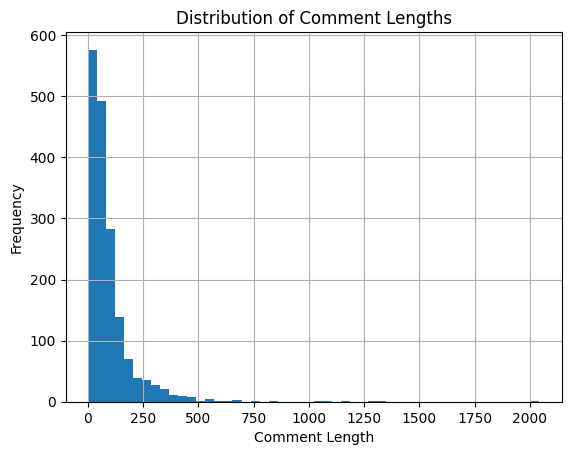

In [27]:
# la distribution de la longueur des commentaires
df['comment_length'] = df['comment'].str.len()
df['comment_length'].hist(bins=50)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()

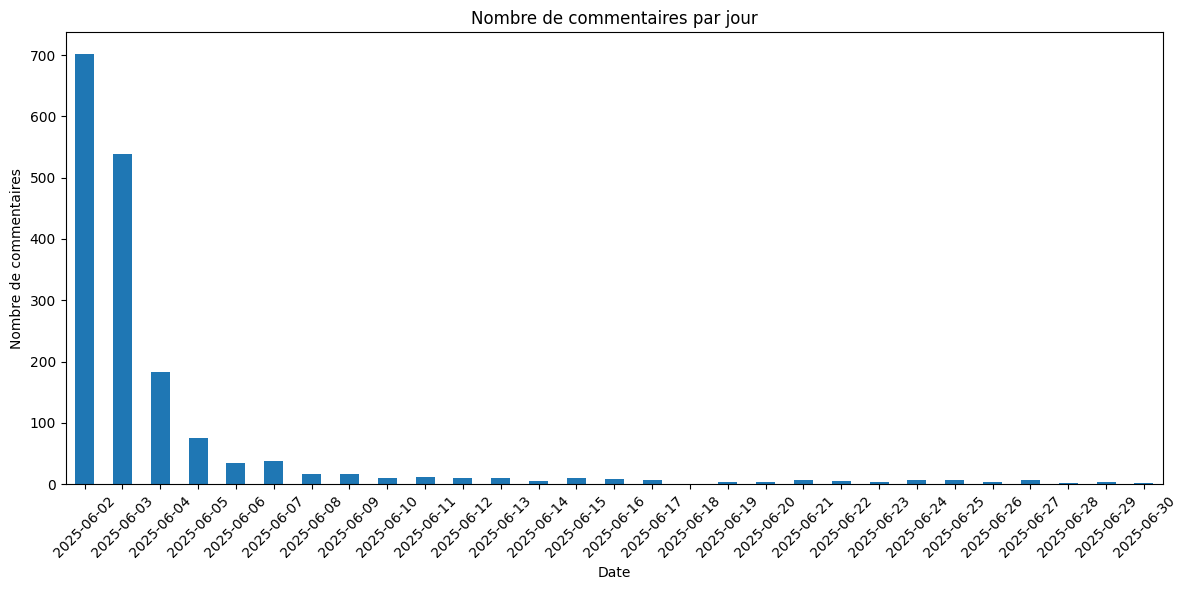

In [42]:
# le nombre de commentaires par jour
df['date'] = df['publishedAt'].dt.date
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Nombre de commentaires par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de commentaires')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# le nombre de commentaires par utilisateur
df['author'].value_counts().head(10)
# le nombre de commentaires par jour
df['date'] = df['publishedAt'].dt.date
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.show()

# EDA deuxième niveau : analyse du texte

<Axes: title={'center': 'Most Common Words in Comments'}, xlabel='Samples', ylabel='Counts'>

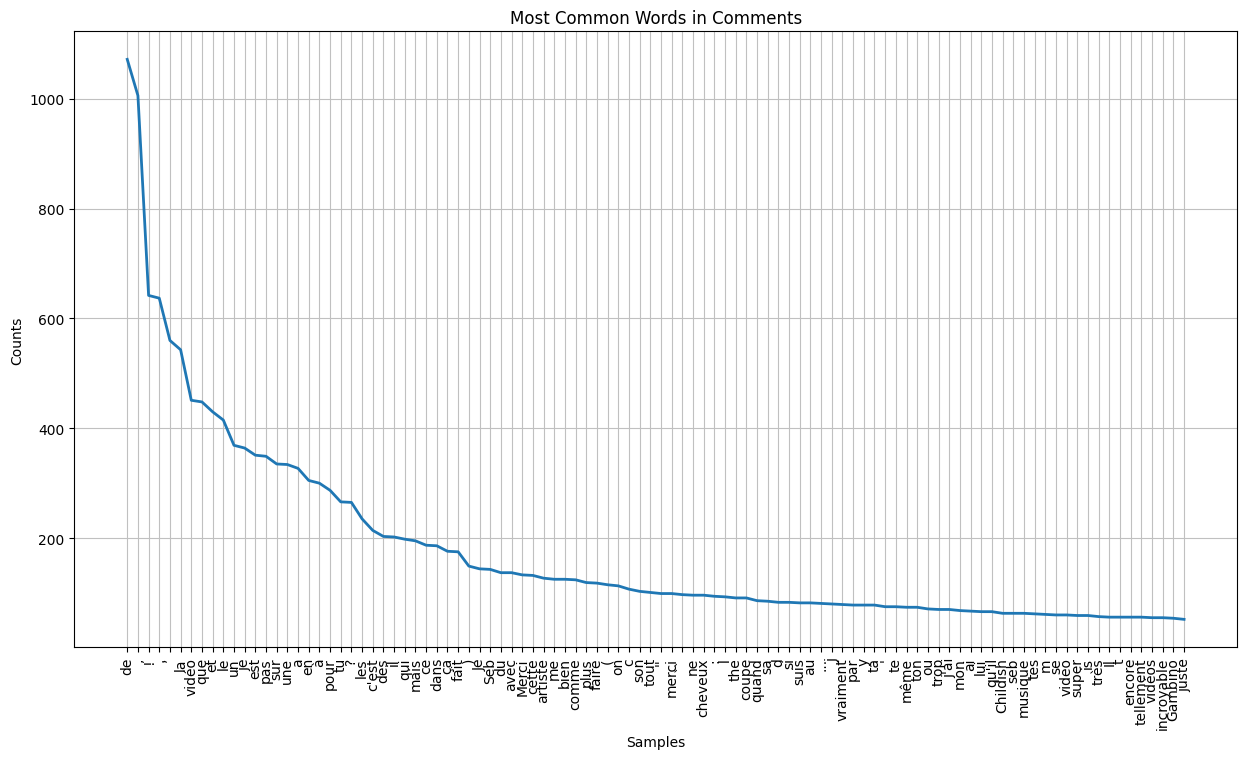

In [62]:
text = nltk.word_tokenize(' '.join(df['comment'].dropna()))
raw = nltk.Text(text)
fdistr = FreqDist(raw)
# freqDist ne fonctionne que sur des fichiers traités or c'est ce qu'on a fait avec le découpage en mot
# donc ça compte bien la fréquence des mots
# si on prend le fichier brut sans le couper en mots ça compte la fréquence de caractères
plt.figure(figsize=(15, 8))
fdistr.plot(100, cumulative=False, title='Most Common Words in Comments')

In [44]:
# le nombre de mots uniques
unique_words = set(nltk.word_tokenize(' '.join(df['comment'].dropna())))

print(f'Nombre de mots uniques : {len(unique_words)}, le nombre de mots :{df["comment"].str.split().str.len().sum()}')

Nombre de mots uniques : 5795
